## CSE 2794 – Machine Learning Workshop 2
### LAB ASSIGNMENT-3: OTIMIZATION AND REGULARIZATION IN NEURAL NETWORKS

#### Name: Sai Kiran Mohanty 
#### Reg. No.: 2341013236
#### Section: 2c3

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , MinMaxScaler ,KBinsDiscretizer ,LabelEncoder
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , precision_score , recall_score, f1_score , classification_report , confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , BatchNormalization
from tensorflow.keras.utils import to_categorical

In [4]:
data = pd.read_csv("winequality-red.csv", delimiter=';')
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
n_col = len(data.columns)
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
z_score = {}
for column in data.select_dtypes(include=[np.number]).columns:
    z_score[column] = zscore(data[column])
for column in z_score:
    data[f'Z_{column}'] = z_score[column]

In [7]:
z_data = data.iloc[:,n_col:]
z_data.head(2)

,Z_fixed acidity,Z_volatile acidity,Z_citric acid,Z_residual sugar,Z_chlorides,Z_free sulfur dioxide,Z_total sulfur dioxide,Z_density,Z_pH,Z_sulphates,Z_alcohol,Z_quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823


<Axes: >

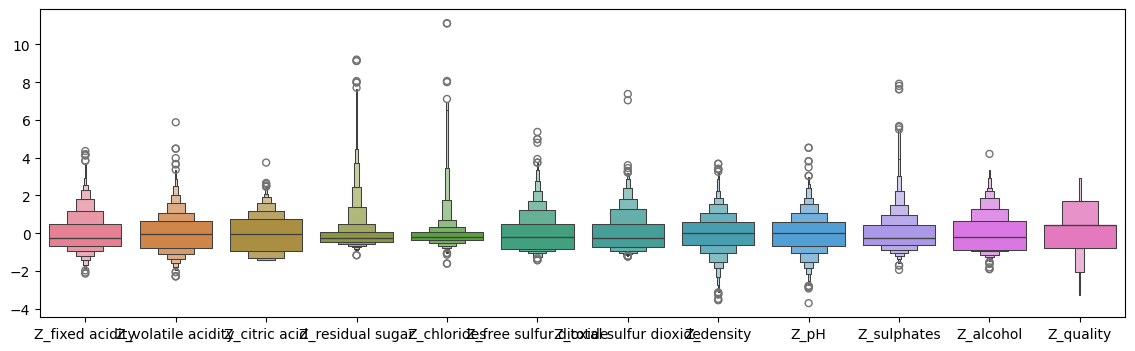

In [8]:
plt.figure(figsize=(14,4))
plt.tight_layout()
sns.boxenplot(z_data)

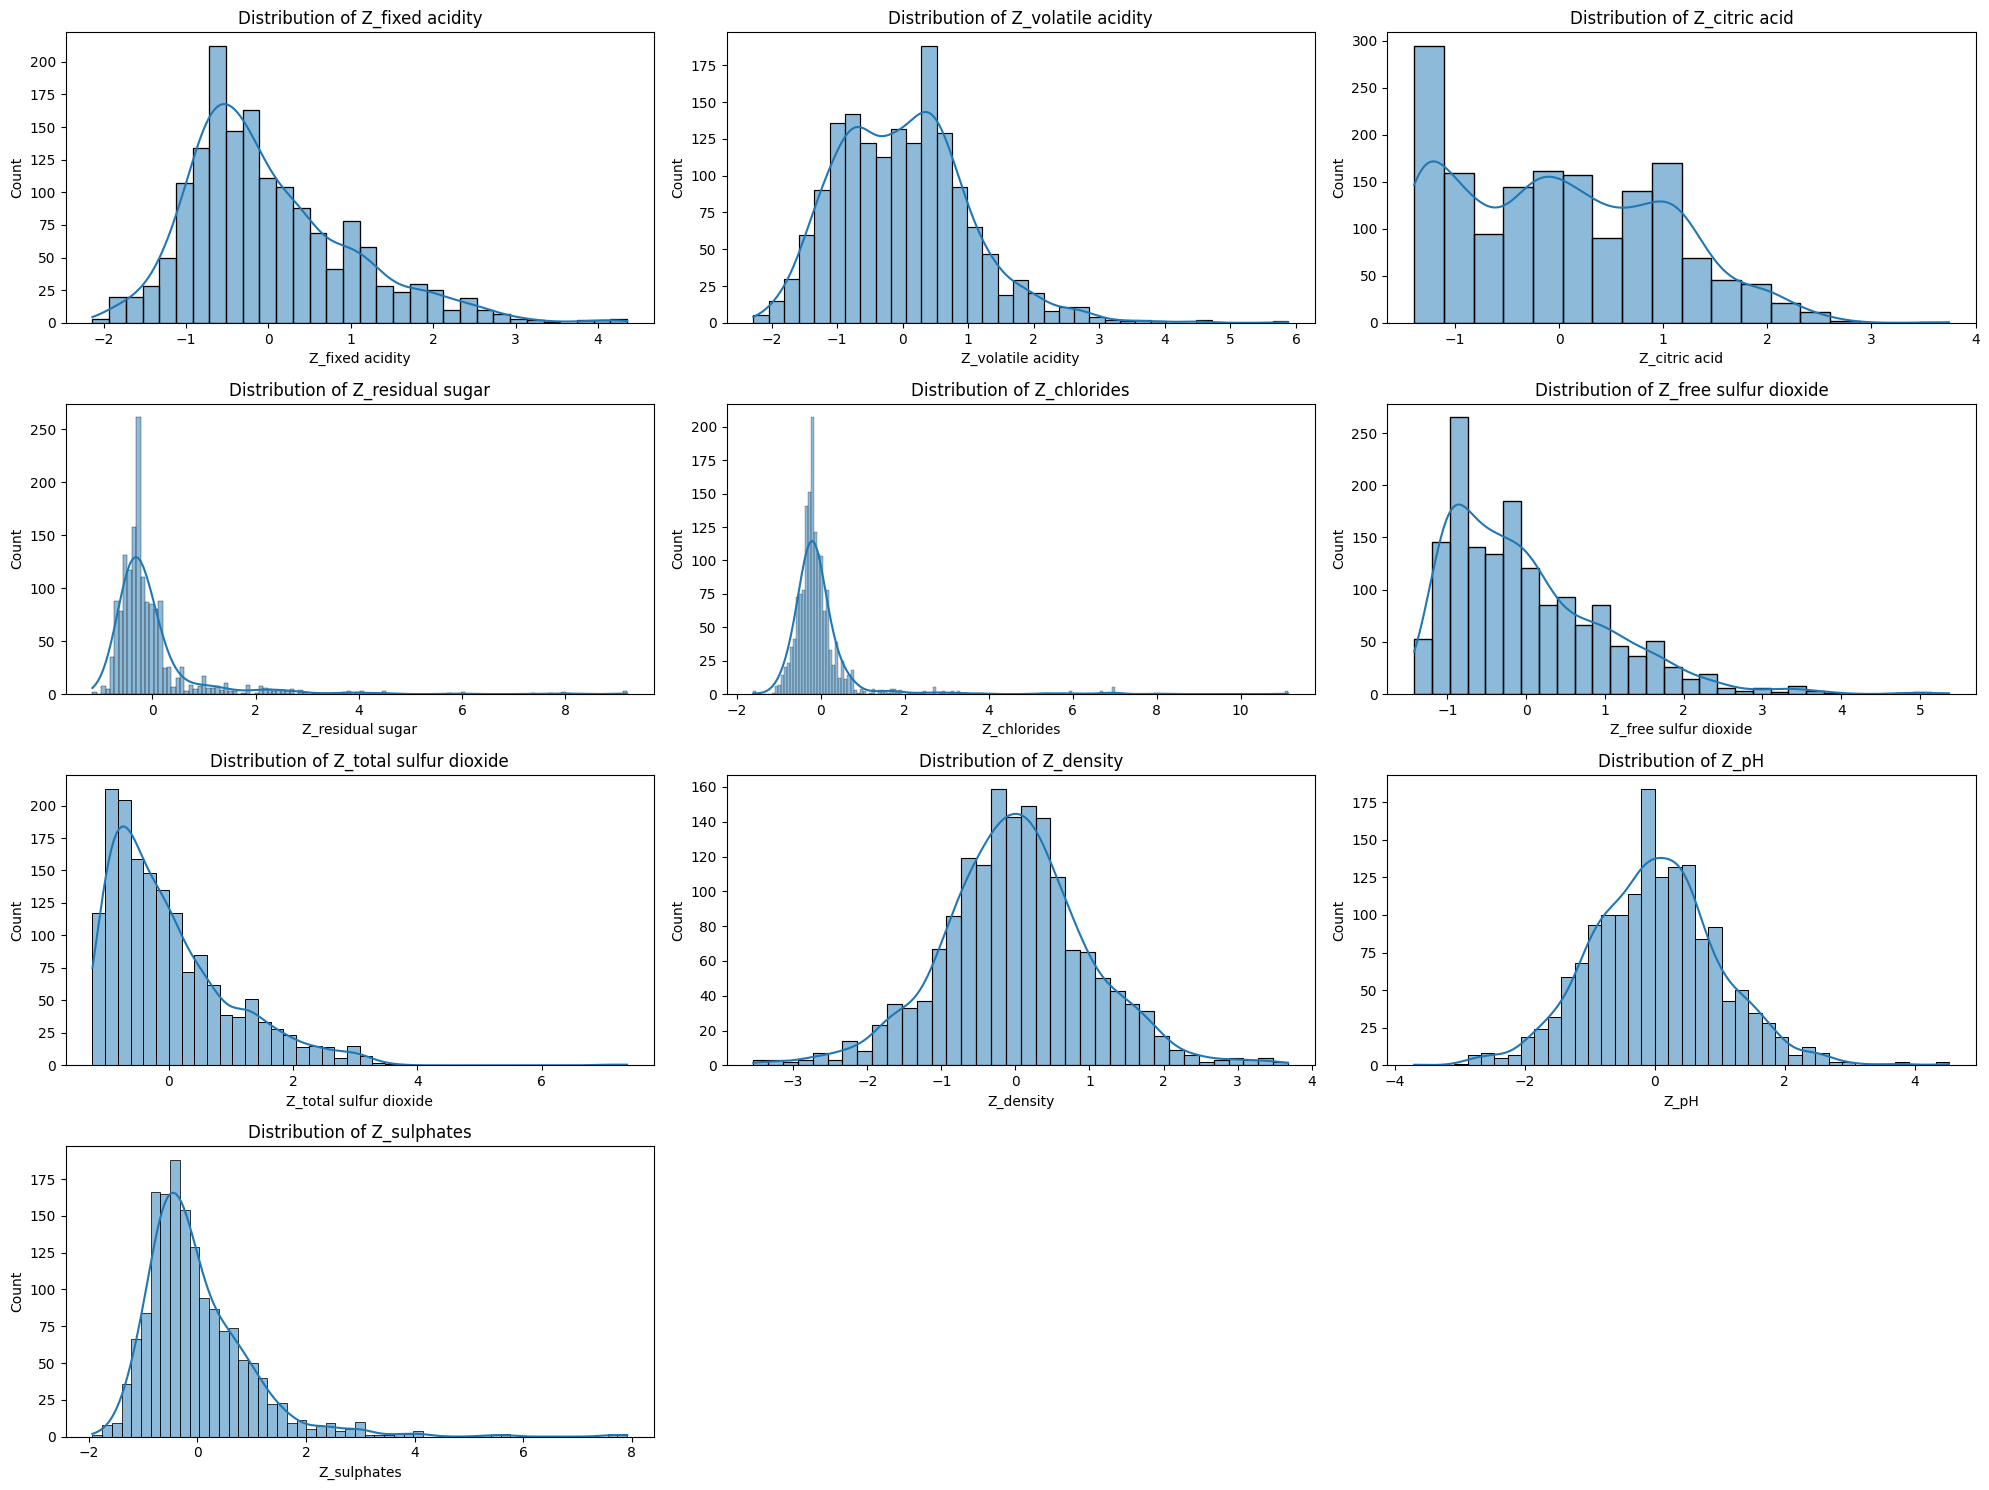

In [9]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(z_data.columns[:-2]):
    plt.subplot(4, 3, i+1)
    sns.histplot(data=z_data, x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [42]:
kbins = KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='uniform')
z_data['Z_alcohol'] = kbins.fit_transform(z_data[['Z_alcohol']])
bin_labels = {0:'low',1:'medium',2:'high'}
z_data['Z_alcohol'] = z_data['Z_alcohol'].map(bin_labels)
le = LabelEncoder()
z_data['Z_alcohol'] = le.fit_transform(z_data['Z_alcohol'])
scaler = MinMaxScaler()
z_data.iloc[:, [0,2]] = scaler.fit_transform(z_data.iloc[:, [0,2]])
std_scaler = StandardScaler()
z_data_scaled = std_scaler.fit_transform(z_data)
z_data_scaled = pd.DataFrame(z_data_scaled,columns=z_data.columns)

In [44]:
X = z_data_scaled.drop(['Z_quality'], axis=1)
y = z_data_scaled['Z_quality']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2) 

In [46]:
print(len(z_data_scaled['Z_quality'].unique()))
X_train.shape , X_test.shape , y_train.shape , y_test.shape

6


((1279, 11), (320, 11), (1279,), (320,))

In [48]:
y_train = to_categorical(y_train,num_classes=6)
y_test = to_categorical(y_test,num_classes=6)

model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11,kernel_regularizer=keras.regularizers.l2(0.01)))


model.add(Dense(11,activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(11,activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))

model.add(Dense(6,activation='softmax'))

model.summary()

# model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy', metrics=['accuracy'])

# history = model.fit(X_train,y_train,epochs=10,batch_size=22,validation_split=0.2,verbose=1)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11)             │            44 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │            72 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 512 (2.00 KB)

 Trainable params: 490 (1.91 KB)

 Non-trainable params: 22 (88.00 B)

In [50]:
def compile_model(opt,batch_size=32):
    
    print(f"Optimizer used: {opt.__class__.__name__}")
    model.compile(optimizer = opt , loss = 'categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train,y_train,epochs=5,batch_size=batch_size,validation_split=0.2,verbose=1)

    y_pred_proba = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred_proba, axis=1)  
    y_true = np.argmax(y_test, axis=1)  
    accuracy = accuracy_score(y_true, y_pred_classes)
    print(f"accuracy : {accuracy}")
    print('-------------------------------------------------------------------------------------------------------------------------')
    
    plt.figure(figsize=(8,4))
    plt.subplot(121)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss Vs. Val_Loss')
    plt.subplot(122)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Acuuracy Vs. Val_Accuracy')
    plt.tight_layout()

Optimizer used: SGD
Epoch 1/5
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8316 - loss: 1.4261 - val_accuracy: 0.3438 - val_loss: 3.1128
Epoch 2/5
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8424 - loss: 0.8118 - val_accuracy: 0.5586 - val_loss: 1.5473
Epoch 3/5
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8223 - loss: 0.7685 - val_accuracy: 0.7070 - val_loss: 1.0040
Epoch 4/5
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8295 - loss: 0.7016 - val_accuracy: 0.8047 - val_loss: 0.8133
Epoch 5/5
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8106 - loss: 0.7137 - val_accuracy: 0.7969 - val_loss: 0.7624
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
accuracy : 0.8375
-------------------------------------------------------------------------------------------------------------------------


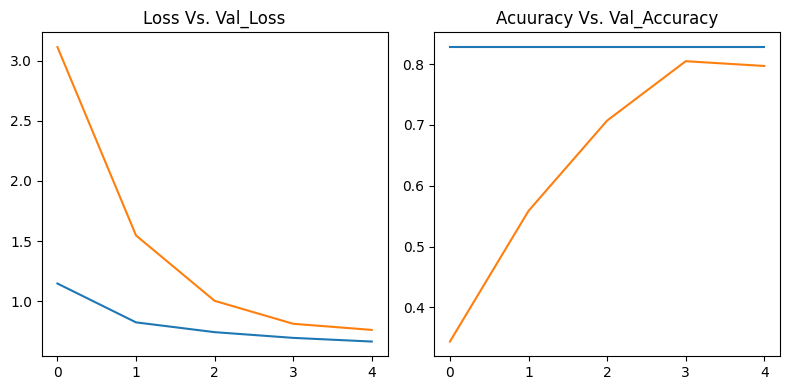

In [52]:
SGD = keras.optimizers.SGD()
compile_model(SGD,1)

SGD With Momentum
Optimizer used: SGD
Epoch 1/5
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8476 - loss: 0.5919 - val_accuracy: 0.7969 - val_loss: 0.7414
Epoch 2/5
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8294 - loss: 0.6417 - val_accuracy: 0.7969 - val_loss: 0.7358
Epoch 3/5
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8240 - loss: 0.6369 - val_accuracy: 0.7969 - val_loss: 0.7312
Epoch 4/5
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8300 - loss: 0.6068 - val_accuracy: 0.7969 - val_loss: 0.7291
Epoch 5/5
1023/1023 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8409 - loss: 0.5834 - val_accuracy: 0.7969 - val_loss: 0.7252
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
accuracy : 0.8375
-------------------------------------------------------------------------------------------------------------------------


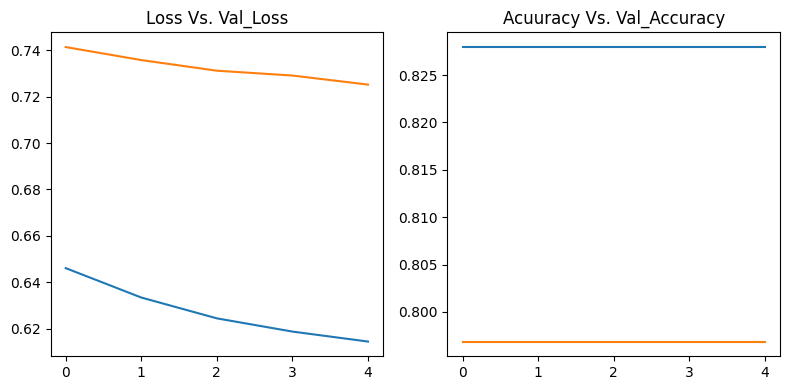

In [53]:
SGD_mommentum = keras.optimizers.SGD(momentum=0.9)
print('SGD With Momentum')
compile_model(SGD,1)

Optimizer used: Adagrad
Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8265 - loss: 0.6442 - val_accuracy: 0.7969 - val_loss: 0.7236
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8131 - loss: 0.6432 - val_accuracy: 0.7969 - val_loss: 0.7227
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8233 - loss: 0.6235 - val_accuracy: 0.7969 - val_loss: 0.7219
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8269 - loss: 0.6038 - val_accuracy: 0.7969 - val_loss: 0.7212
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8241 - loss: 0.6368 - val_accuracy: 0.7969 - val_loss: 0.7205
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
accuracy : 0.8375
-------------------------------------------------------------------------------------------------------------------------


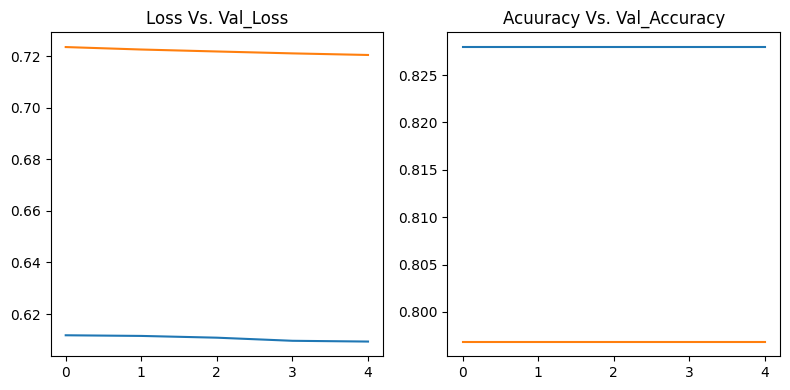

In [54]:
AdaGrad = keras.optimizers.Adagrad()
compile_model(AdaGrad)

Optimizer used: RMSprop
Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8285 - loss: 0.6074 - val_accuracy: 0.7969 - val_loss: 0.6737
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8124 - loss: 0.6011 - val_accuracy: 0.8047 - val_loss: 0.6411
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8362 - loss: 0.5357 - val_accuracy: 0.8164 - val_loss: 0.6282
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8235 - loss: 0.5123 - val_accuracy: 0.8047 - val_loss: 0.6327
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8297 - loss: 0.5171 - val_accuracy: 0.8086 - val_loss: 0.6243
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
accuracy : 0.8375
-------------------------------------------------------------------------------------------------------------------------


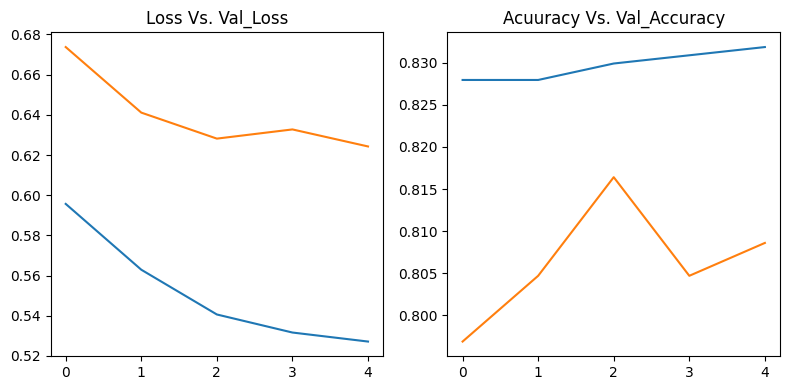

In [55]:
RMSProp = keras.optimizers.RMSprop()
compile_model(RMSProp)

Optimizer used: Adam
Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8332 - loss: 0.5093 - val_accuracy: 0.8203 - val_loss: 0.6130
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8345 - loss: 0.5233 - val_accuracy: 0.8203 - val_loss: 0.6120
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8305 - loss: 0.5088 - val_accuracy: 0.8203 - val_loss: 0.6066
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8363 - loss: 0.4926 - val_accuracy: 0.8125 - val_loss: 0.6108
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8461 - loss: 0.4815 - val_accuracy: 0.8164 - val_loss: 0.6126
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
accuracy : 0.85
-------------------------------------------------------------------------------------------------------------------------


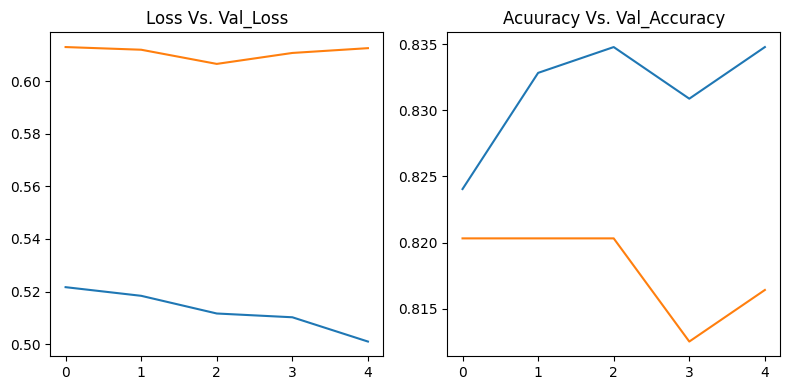

In [56]:
Adam = keras.optimizers.Adam()
compile_model(Adam)